Автор: Марков Виктор

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.interpolate import lagrange

# Метод наименьших квадратов

In [ ]:
!gdown 1OkKuyXHnC8-Whlvpve7BjlMiLJ7uHrTx

Downloading...
From: https://drive.google.com/uc?id=1OkKuyXHnC8-Whlvpve7BjlMiLJ7uHrTx
To: /content/Ice Cream Sales - temperatures.csv
100% 3.68k/3.68k [00:00<00:00, 8.58MB/s]


Перед нами - [датасет](https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales/data) с зависимостью продаж мороженого от температуры на улицу (в Фаренгейтах). Постройте линейную аппроксимацию данных, применив метод наименьших квадратов.

Визуализирую результат, построив график зависимости продаж от температуры (*plt.scatter*) и получившееся приближение (*plt.plot*).

**TIP:** в данных есть повторения, поэтому требуется предобработка (для каждой температуры буду брать соответствующее или максимальное, или среднее значение).

# Считаем и обработаем данные



In [ ]:
data = pd.read_csv('Ice Cream Sales - temperatures.csv')
data.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


<ipython-input-4-154a0591be96>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


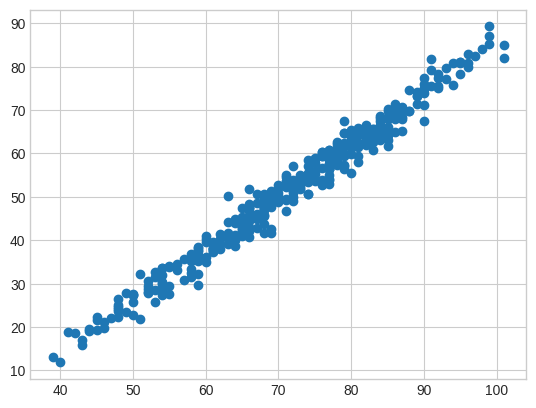

In [ ]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.plot(data['Temperature'], data['Ice Cream Profits'], ls = '', marker = 'o')

Из этого графика мы видим, что поведение наших точек можно описать с помощью линейной зависимости, следовательно нам выгодно применить линейную аппроксимацию с использованием метода наименьших квадратов

Проверим датсет на отсутствие значений

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


Видим, что отсутствующих значений нет, проверим датасет на наличие повторений

In [ ]:
data.nunique()

Temperature           62
Ice Cream Profits    352
dtype: int64

Так как в данных есть повторения, возьмем среднее среди значений Ice Cream Profits для одинаковых значений Temperature


In [ ]:
data['Average Profit'] = data.groupby('Temperature')['Ice Cream Profits'].transform('mean')
data

,Temperature,Ice Cream Profits,Average Profit
0,39,13.17,13.170000
1,40,11.88,11.880000
2,41,18.82,18.820000
3,42,18.65,18.650000
4,43,17.02,16.450000
...,...,...,...
360,99,85.13,87.166667
361,99,87.08,87.166667
362,99,89.29,87.166667
363,101,81.91,83.465000


Сравним графики данных без обработки и с обработкой

Text(0, 0.5, 'Профт с продаж')

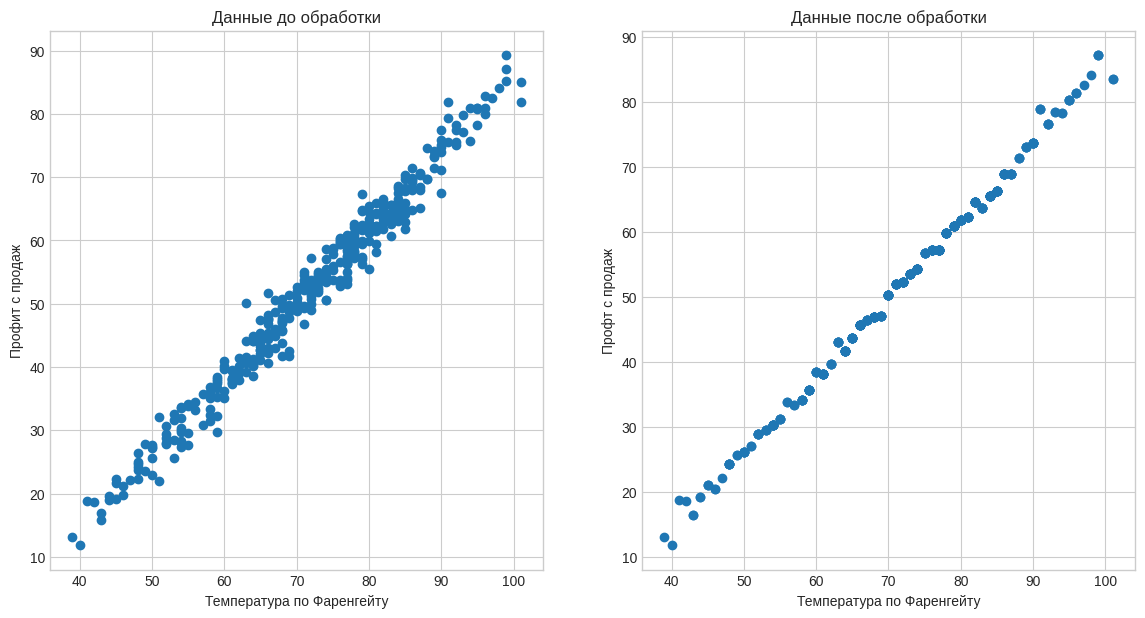

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

axes[0].plot(data['Temperature'], data['Ice Cream Profits'], ls = '', marker = 'o')
axes[1].plot(data['Temperature'], data['Average Profit'], ls = '', marker = 'o')

axes[0].set_title('Данные до обработки')
axes[1].set_title('Данные после обработки')

axes[0].set_xlabel('Температура по Фаренгейту')
axes[0].set_ylabel('Профит с продаж')
axes[1].set_xlabel('Температура по Фаренгейту')
axes[1].set_ylabel('Профт с продаж')

Таким образом наши данные стали удобнее и не менее актуальными для применения аппроксимации

# Собственная реализация аппроксимации и сравнение с NumPy-евской

Считаю коэффициенты нашей функции используя формулы

In [ ]:
x = data['Temperature']
y = data['Average Profit']

average_x = 0
average_y = 0
average_xy = 0
average_xx = 0
n = len(x)
for i in range(n):
  average_x += x[i]
  average_y += y[i]
  average_xy += x[i]*y[i]
  average_xx += x[i]**2
average_x = average_x/n
average_y = average_y/n
average_xy = average_xy/n
average_xx = average_xx/n
d_x = average_xx - average_x**2
a = (average_xy - average_x*average_y)/d_x
b = average_y - a * average_x

print('a  = ', a)
print('b  = ', b)

a  =  1.1920089289729043
b  =  -33.69816600247986


Построю график получившейся функции

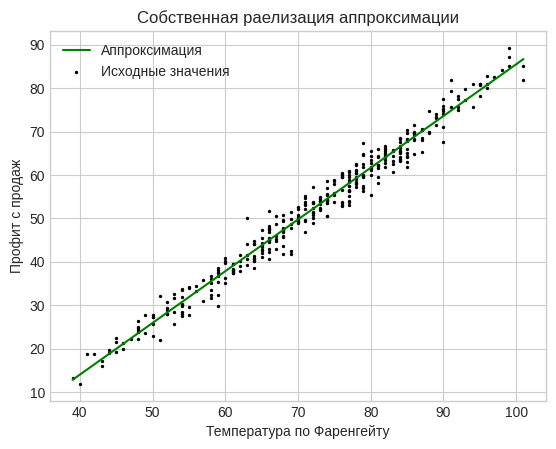

In [ ]:
plt.figure()

plt.plot(data['Temperature'], a * data['Temperature'] + b, label = 'Аппроксимация', c = 'g')
plt.scatter(data['Temperature'], data['Ice Cream Profits'], label = 'Исходные значения',color = 'black', s = 2)

plt.title('Собственная раелизация аппроксимации')

plt.xlabel('Температура по Фаренгейту')
plt.ylabel('Профит с продаж')

plt.legend()

Теперь посчитаем коэффициенты через NumPy с помощью функции polyfit и сравним получившиеся графики

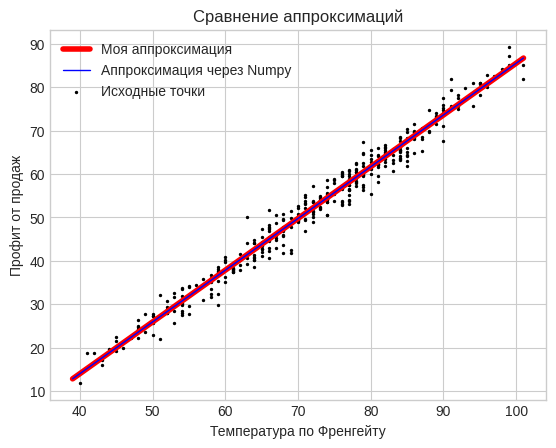

In [ ]:
k = np.polyfit(data['Temperature'], data['Average Profit'], 1)

plt.figure()

plt.plot(data['Temperature'], a * data['Temperature'] + b, label = 'Моя аппроксимация', c = 'red', linewidth = 4)
plt.plot(data['Temperature'], k[0] * data['Temperature'] + k[1], label = 'Аппроксимация через Numpy', c = 'blue', linewidth = 1)
plt.scatter(data['Temperature'], data['Ice Cream Profits'], label = 'Исходные точки', c = 'black', s = 2)

plt.title('Сравнение аппроксимаций')

plt.xlabel('Температура по Френгейту')
plt.ylabel('Профит от продаж')

plt.legend()
plt.show()

Из данного графика мы можем понять, что наша аппроксимация и аппроксимация реализованная с помощью функций NumPy совпали. Ура.


# Псевдообратная матрица

In [ ]:
!gdown 1pVI_yi7AKfsudZl6VG4ZwA-8mfx0Gg3q

Downloading...
From: https://drive.google.com/uc?id=1pVI_yi7AKfsudZl6VG4ZwA-8mfx0Gg3q
To: /content/Student_Performance.csv
100% 175k/175k [00:00<00:00, 33.2MB/s]


Другой [датасет](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) - об успеваемости студентов. Попробуем предобработать данные (перевести категориальные переменные в числовые) и построить псевдообратную матрицу для линейной аппроксимации, а затем решить систему уравнений $AX=\mathcal{B}$ и найти ее псевдорешение.

Также решение можно проверять на датасете из предыдущего пункта.

Считываем данные

In [ ]:
data = pd.read_csv('Student_Performance.csv')
df = data.drop_duplicates()
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Сделаем признак 'Extracurricular Activities' числовым

In [ ]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Создадим столбец с коэффициентами, которые будем предсказывать, отделим столбец с нужным нам коэффициентом и разделим датасет на тренировчоную и тестовую выборки

In [ ]:
X = data.drop('Performance Index', axis = 1)
y = data['Performance Index']
X['new coeff'] = [1 for i in range(len(data))]
display(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,new coeff
0,7,99,1,9,1,1
1,4,82,0,4,2,1
2,8,51,1,7,2,1
3,5,52,1,5,2,1
4,7,75,0,8,5,1
...,...,...,...,...,...,...
9995,1,49,1,4,2,1
9996,7,64,1,8,5,1
9997,6,83,1,8,5,1
9998,9,97,1,7,0,1


0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Найдем коэф. регрессии, посчитав псевдообратную матрицу

In [ ]:
A = X_train.values
A = np.matrix(A)

A_plus = np.linalg.inv((A.T @ A)) @ A.T
X = A_plus @ y_train

print('Псевдообратная матрица:\n', A_plus, '\n')
print('Коэффициенты линейной регресии:\n', X)

Псевдообратная матрица:
 [[ 6.36523255e-05  8.53475828e-05  6.29360104e-05 ...  2.03689716e-05
  -4.10277590e-05 -4.14588559e-05]
 [-8.53821112e-06 -5.66782893e-06 -3.16805947e-06 ...  5.09069803e-06
  -2.10823000e-06 -1.36910089e-07]
 [-2.73282168e-04 -2.69115451e-04 -2.93546572e-04 ...  2.68696985e-04
  -2.64348139e-04 -2.78665378e-04]
 [ 7.15066626e-05  1.21404498e-04 -2.82636479e-05 ... -1.23655094e-04
   7.12306361e-05 -2.85671888e-05]
 [-9.39747985e-06 -2.67883508e-05  6.01217559e-05 ...  4.16775349e-05
  -7.70462522e-05 -4.23513697e-05]
 [ 1.27353319e-04 -4.28890233e-04  1.04768080e-04 ...  1.73125746e-04
   5.09461595e-04  8.76014994e-04]] 

Коэффициенты линейной регресии:
 [  2.84231537   1.01926179   0.62601892   0.47993426   0.19449364
 -34.06361406]


Предскажем коэффициенты используя нашу псевдообратную матрицу и сравним с реальными значениями

In [ ]:
pr = X_test @ X.T
comp = pd.DataFrame({'Performance Index':y_test,'Predictions':pr})
comp

,Performance Index,Predictions
8018,65.0,65.988641
9225,51.0,48.509955
3854,35.0,36.161642
2029,97.0,93.338698
3539,87.0,84.913996
...,...,...
4208,69.0,68.319061
5335,60.0,60.418134
2554,73.0,71.165320
13,33.0,33.204307


Посчитаем метрики

In [ ]:
print('MAE = ', mean_absolute_error(y_test,pr))
print('MSE = ', mean_squared_error(y_test,pr))
r2_score(y_test, pr)

MAE =  1.6420986366675883
MSE =  4.2772041201940105


0.9885085025387609

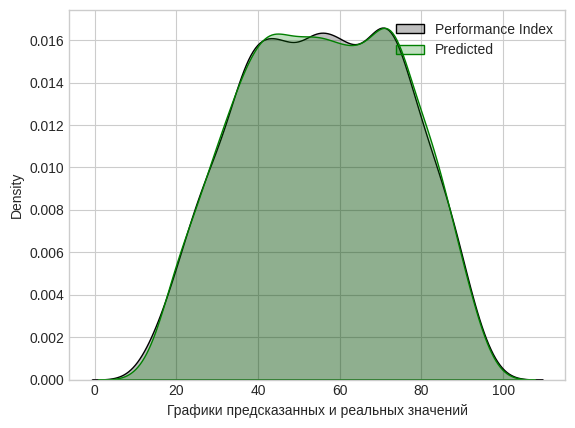

In [ ]:
plt.figure()

sns.kdeplot(comp['Performance Index'], fill=True, color='black')
sns.kdeplot(comp['Predictions'], color='green', fill=True)

plt.xlabel('Графики предсказанных и реальных значений')

plt.legend(labels = ['Performance Index','Predicted'])

Теперь воспользуемся библиотекой sklearn с готой функцией линейной регрессии

In [ ]:
data = pd.read_csv('Student_Performance.csv')
data = data.drop_duplicates()

data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X = data.drop('Performance Index', axis = 1)
y = data['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

lr = LinearRegression()
lr.fit(X_train,y_train)
pr = lr.predict(X_test)
comp = pd.DataFrame({'Performance Index':y_test,'Predictions':pr})
comp

,Performance Index,Predictions
8961,53.0,52.666312
3185,62.0,62.720522
1923,63.0,64.093242
1336,68.0,67.898369
3732,32.0,32.925744
...,...,...
8140,67.0,68.382231
3242,36.0,38.638274
2355,84.0,81.322413
7016,58.0,59.681537


In [ ]:
print('MAE = ', mean_absolute_error(y_test,pr))
print('MSE = ', mean_squared_error(y_test,pr))
r2_score(y_test, pr)

MAE =  1.6104394594335396
MSE =  4.08479123388466


0.9886688694877964

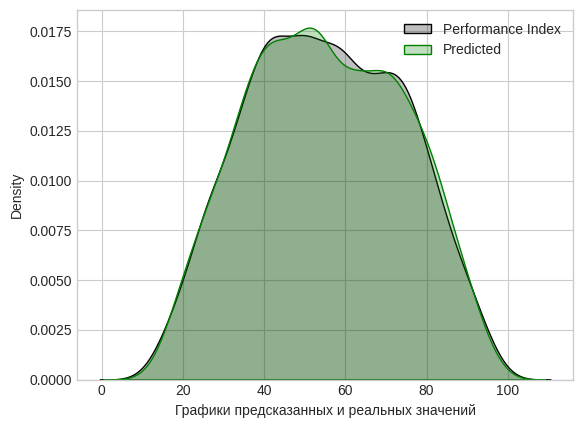

In [ ]:
plt.figure()

sns.kdeplot(comp['Performance Index'], fill=True, color='black')
sns.kdeplot(comp['Predictions'], color='green', fill=True)

plt.xlabel('Графики предсказанных и реальных значений')

plt.legend(labels = ['Performance Index','Predicted'])

# Полином Лагранжа

Данные - зависимость доходности некоторой облигации от ее срока погашения. Нужно построить полином Лагранжа и оценить значение доходности облигации в пропущенные в данных года (**4, 6, 8, 9 лет**)


In [ ]:
# Sample data for the yield curve

maturities = np.array(
    [1, 2, 3, 5, 7, 10]
)  # Maturities in years

interest_rates = np.array(
    [0.02, 0.025, 0.03, 0.035, 0.04, 0.045]
)  # Corresponding interest rates

Реализуем собственную функцию полинома Лагранжа

In [ ]:
x_values = maturities
y_values = interest_rates
mis_years = [4, 6, 8, 9]

def create_basic_polynomial(x_values, i):
    def basic_polynomial(x):
        divider = 1
        result = 1
        for j in range(len(x_values)):
            if j != i:
                result *= (x-x_values[j])
                divider *= (x_values[i]-x_values[j])
        return result/divider
    return basic_polynomial


def create_Lagrange_polynomial(x_values, y_values):
    basic_polynomials = []
    for i in range(len(x_values)):
        basic_polynomials.append(create_basic_polynomial(x_values, i))

    def lagrange_polynomial(x):
        result = 0
        for i in range(len(y_values)):
            result += y_values[i]*basic_polynomials[i](x)
        return result
    return lagrange_polynomial

lag_pol = create_Lagrange_polynomial(x_values, y_values)

print(lag_pol(mis_years))

[0.03320238 0.0368254  0.04458333 0.04822222]


Сравним наши значения с готовыми

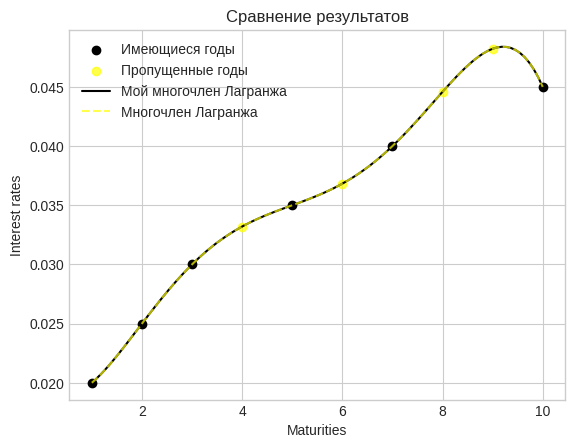

In [ ]:
x_years = np.linspace(1, 10, 100)

lag_pol = create_Lagrange_polynomial(x_values, y_values)
lag_pol1 = lagrange(maturities, interest_rates)

plt.figure()

plt.scatter(maturities, interest_rates, label = 'Имеющиеся годы', c = 'black')
plt.scatter(mis_years, lag_pol(mis_years), label = 'Пропущенные годы', c = 'yellow', alpha = 0.7)
plt.plot(x_years, lag_pol(x_years), c = 'black', label = 'Мой многочлен Лагранжа')
plt.plot(x_years, lag_pol1(x_years), c = 'yellow', label = 'Многочлен Лагранжа', linestyle = '--', alpha = 0.7)

plt.title('Сравнение результатов')

plt.xlabel('Maturities')
plt.ylabel('Interest rates')

plt.legend()

Посмотрим доходность в пропущенные года

In [ ]:
for x in range(len(mis_years)):
  print('Доходность за ', mis_years[x], 'год = ', lag_pol(mis_years)[x])

Доходность за  4 год =  0.03320238095238095
Доходность за  6 год =  0.03682539682539683
Доходность за  8 год =  0.044583333333333336
Доходность за  9 год =  0.04822222222222221


🌞